# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [37]:
def mean(array):
  return sum(array[i] for i in range(len(array))) / len(array)

mean(sales)

3052.714285714286

In [38]:
def variance(array, dof=1):
  return sum((mean(array) - array[i])**2 for i in range(len(array))) / (len(array)-dof)

variance(sales)

214387.90476190473

In [39]:
def std_dev(array, dof=1):
  return (sum((mean(array) - array[i])**2 for i in range(len(array))) / (len(array)-dof))**(1/2)

std_dev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [40]:
customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales':sales, 'customers':customers})

# VARIANCE-COVARIANCE MATRIX
print(df.cov())

# COVARIANCE OF 'sales' AND 'customers'
print(df.cov().iloc[0,1])

# def covariance(array1, array2, dof=1):
#   if len(array1) != len(array2):
#     return "Array length's do not match"
#   mean_1 = mean(array1)
#   mean_2 = mean(array2)
#   array1_diff = sum
#   numerator = sum((mean_1-array1[i])(mean_2-array2[i]) for i in range(len(array1)))
#   denominator = len(array1) - dof
#   return numerator / denominator

# covariance(sales, customers)


                   sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381
7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [41]:
customers_std = std_dev(customers)
print("'customers' standard deviation:", customers_std)

r = df.cov().iloc[0,1] / (std_dev(customers)*std_dev(sales))
print("Calculated correlation coefficient:", r)

print("Pandas correlation coefficient:", df.corr().iloc[0,1])

'customers' standard deviation: 17.057326313123664
Calculated correlation coefficient: 0.9628339778148909
Pandas correlation coefficient: 0.9628339778148908


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [43]:
# COVARIANCE MATRIX
# titanic[['age', 'fare']].cov()
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [44]:
# CORRELATION MATRIX
# titanic[['age', 'fare']].corr()
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

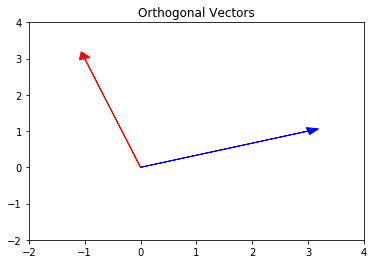

Dot Product: 0


In [45]:
vector_1 = [-1, 3]
vector_2 = [3, 1]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=0.2, head_length=0.2, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=0.2, head_length=0.2, color ='blue')

plt.xlim(-2,4)          
plt.ylim(-2,4)
plt.title("Orthogonal Vectors")

plt.show();

print('Dot Product:', np.dot(vector_1, vector_2))

The synonym for orthogonal is "perpendicular" or forms a 90 degree angle (note, this graph does not look perpendicular due to axis scaling)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]
b = [6, -9, 2]

In [0]:
def dot_product(vector1, vector2):
  if len(vector1) != len(vector2):
    return "Vector length's must be equal"
  return sum(vector1[i]*vector2[i] for i in range(len(vector1)))

In [48]:
print(dot_product(a, b))

-43


Vectors a and b are not orthogonal, as their dot product does not equal 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

In [50]:
linalg.norm(c)**2

665.0

In [51]:
# np.dot(c, c)
dot_product(c, c)

665

In [52]:
np.matmul(np.transpose(c), c)

665

All are the sum of the squares of vector *c*

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
\hat d = \frac{1}{\sqrt{7^{2}+12^{2}}}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \frac{1}{13.89}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} \frac{7}{13.89} \\ \frac{12}{13.89} \end{bmatrix}
\end{align}



\begin{align}
\hat e = \frac{1}{\sqrt{2^{2}+11^{2}+(-8)^{2}}}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \frac{1}{13.75}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \begin{bmatrix} \frac{2}{13.75} \\ \frac{11}{13.75} \\ \frac{-8}{13.75} \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [53]:
f = [4, 12, 11, 9, 2]
(1 / linalg.norm(f)) * np.array(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

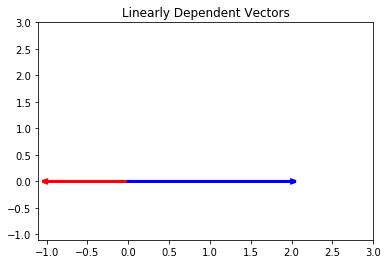

In [54]:
plt.xlim(-1.1,3)          
plt.ylim(-1.1,3)

v = [2, 0] 
v1 = [-1, 0]

plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='red')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='blue')

plt.title("Linearly Dependent Vectors")
plt.show()

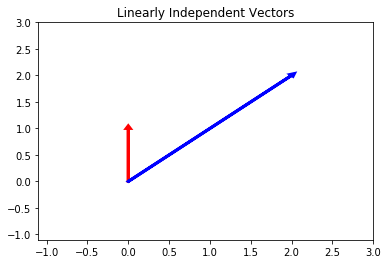

In [57]:
plt.xlim(-1.1,3)          
plt.ylim(-1.1,3)

v = [2, 2] 
v1 = [0, 1]

plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='red')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='blue')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# vectors 'g'and 'h' span 2D space

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# vectors 'l', 'm', and 'n' span 3D space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



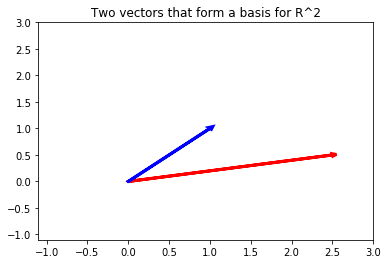

In [61]:
plt.xlim(-1.1,3)          
plt.ylim(-1.1,3)

v = [1, 1] 
v1 = [2.5, 0.5]

plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='red')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, 
          color ='blue')

plt.title("Two vectors that form a basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

For some number of vectors to "form a basis" means that the vectors must be linearly indpendent on a certain span.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
 1, 2, 3
-1, 0, 7
 4, 8, 2

# add row 1 to row 2
1, 2, 3
0, 2, 10
4, 8, 2

# multiply row 1 by 4
4, 8, 12
0, 2, 10
4, 8, 2

# subtract row 3 by row 1
4, 8, 12
0, 2, 10
0, 0,-10

# divide row 1 by 4
1, 2, 3
0, 2, 10
0, 0,-10

# divide row 2 by 2
1, 2, 3
0, 1, 5
0, 0,-10

# divide row 3 by 2
1, 2, 3
0, 1, 5
0, 0,-5

# subtract row 2 by row 3
1, 2, 3
0, 1, 0
0, 0,-5

# divide row 3 by -5
1, 2, 3
0, 1, 0
0, 0, 1

# subtract row 1 by 3 * row 3
1, 2, 0
0, 1, 0
0, 0, 1

# subtract row 1 by 2 * row 3
1, 0, 0
0, 1, 0
0, 0, 1

# EQUALS THE IDENTITY MATRIX

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions our matrix spans

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

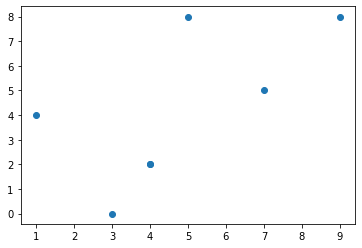

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()